In [ ]:
Submission By : KURVA SHIVATHMIKA
EMAIL SPAM DETECTION WITH MACHINE LEARNING
Data Science Internship
TASK 4
Dataset: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/vivek/OneDrive/Desktop/New folder (3)/spam.csv", encoding="ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [8]:
df['v2'].value_counts() 

Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"               4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                                      

In [9]:
df.dtypes

v1    object
v2    object
dtype: object

In [10]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
df.rename(columns={'v1':'Class','v2':'Mail'},inplace=True)
df.columns

Index(['Class', 'Mail'], dtype='object')

In [13]:
df.loc[df['Class']=='spam','Class',]=0
df.loc[df['Class']=='ham','Class',]=1

In [ ]:
DATA VISUALIZATION

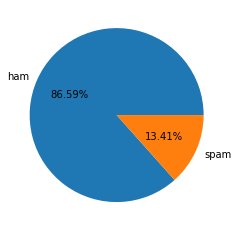

In [14]:
a=['ham','spam']
b=df['Class'].value_counts()
plt.pie(b,labels=a,autopct='%1.2f%%')
plt.show()

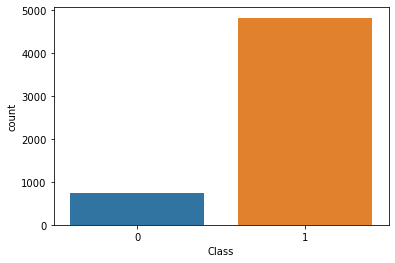

In [15]:
import seaborn as sns
sns.countplot(x='Class', data=df )
plt.show()

<AxesSubplot:ylabel='Frequency'>

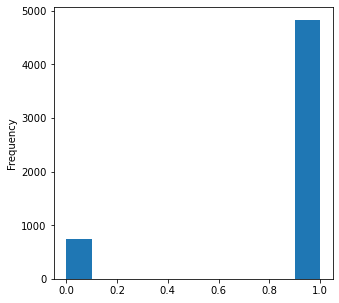

In [16]:
df['Class'].plot(bins=10,kind='hist',figsize=(5,5))

In [19]:
from sklearn.model_selection import train_test_split
X=df['Mail']
Y=df["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
f=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
x_train=f.fit_transform(X_train)
x_test=f.fit_transform(X_test)

In [22]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [24]:
model=LogisticRegression()
model.fit(x_train,y_train)
pred_train=model.predict(x_train)
accuracy=accuracy_score(y_train,pred_train)*100
print("Accuracy of the model is:",accuracy)
cnf=metrics.confusion_matrix(y_train,pred_train)
cnf

Accuracy of the model is: 96.94862014808166


array([[ 463,  134],
       [   2, 3858]], dtype=int64)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
# KNN Classifier
model3 = KNeighborsClassifier()
model3.fit(x_train,y_train)
ypred = model3.predict(x_train)
accuracy_knn = accuracy_score(y_train, ypred)*100
print('Accuracy of the model is:',accuracy_knn) 
cnf=metrics.confusion_matrix(y_train,pred_train)
cnf

Accuracy of the model is: 91.58626879066637


array([[ 463,  134],
       [   2, 3858]], dtype=int64)